### Mesh Generation using TINerator
Daniel Livingston, Los Alamos National Laboratory; Raymond Lee, Pacific Northwest National Laboratory

***

The following workflow provides guidance on running the software package TINerator to generate a structured or unstructured mesh with facesets (.exo) starting with only a digital elevation model (DEM) file (.asc). This workflow has been used to generate a mesh and facesets used in the hydrological flow and reactive transport model, Advanced Terrestrial Simulator (ATS), for the subbasin scale at the Hanford Reach, Washington. This workflow describes the process to generate that mesh as an example.

Software required in the workflow: Jupyter Notebook

Software optional in the workflow: QGIS or ArcGIS; Paraview

Data required in the workflow: a DEM file (.asc)

## Table of Contents
-------------------

[Introduction: What is TINerator?](#Introduction)

[Workflow: Generate a full mesh from a DEM using TINerator](#Workflow)

1. [Install TINerator](#Workflow1)
1. [Import DEM](#Workflow2)
1. [Delineate watershed](#Workflow3)
1. [Create surface mesh](#Workflow4)
1. [Create layered mesh](#Workflow5)
1. [Create facesets](#Workflow6)
1. [Export final mesh](#Workflow7)

[Conclusion: Additional resources](#Conclusion)

[Appendix: All code](#Appendix)

<a id='Introduction'></a>
### Introduction: What is TINerator?

TINerator is a user-friendly tool for the fast creation of meshes extruded and refined from DEM and GIS data. This tool was developed at Los Alamos National Laboratory to aid in hydrogeological simulations. TINerator allows a user to define a bounding box of latitude/longitude coordinates, a shapefile, or a local DEM and then generate a mesh for that given surface or volume. The mesh will have the topology of the DEM, along with user-defined material IDs and depths for stacked layers. Further, TINerator delineates the watershed boundaries on the defined DEM, identifies stream networks, and then refines mesh elements around the stream features to a user-defined length scale. Facesets can be easily created to aid in applying boundary conditions, such as a no-flow zone. TINerator comes with a host of 2D and 3D visualization functions, allowing the user to view the status of the mesh at every step in the workflow. In addition, there are geometrical tools for removing triangles outside of a polygon, generating quality analytics on the mesh, adding cell- and node-based attributes to a mesh, and much more. Visit the official repository at: https://github.com/lanl/LaGriT/tree/tinerator

TINerator takes advantage of commands for LaGriT (Los Alamos Grid Toolbox), a library of user callable tools that provide mesh generation, mesh optimization, and dynamic mesh maintenance in two and three dimensions. LaGriT is used for a variety of geology and geophysics modeling applications including porous flow and transport model construction, finite element modeling of stress/strain in crustal fault systems, seismology, discrete fracture networks, asteroids and hydrothermal systems. The general capabilities of LaGriT can also be used outside of earth science applications and applied to nearly any system that requires a grid/mesh and initial and boundary conditions, setting of material properties, and other model setup functions. It can also be used as a tool to pre- and post-process and analyze vertex and mesh-based data. Visit the official repository at: https://github.com/lanl/LaGriT

<a id='Workflow'></a>
### Workflow: Generate a full mesh from a DEM using TINerator

<a id='Workflow1'></a>
#### Install TINerator

#### Install package and dependencies

Open up a terminal within Jupyter (File -> New -> Terminal), and run:

```git clone https://github.com/lanl/LaGriT.git tinerator && cd tinerator && git checkout tinerator```

```python setup.py install```

Install the following dependencies:

```import sys```

```module load python```

```conda install -c conda-forge libgdal```

```conda install -c conda-forge gdal```

```conda install -c conda-forge vtk```

```conda install -c conda-forge pyvista```

```conda install -c conda-forge fiona```

```conda install -c conda-forge geopandas```

```conda install -c conda-forge rasterio```

```conda install -c conda-forge krb5```

```conda install -c conda-forge richdem```

```conda install -c conda-forge scikit-fmm```

```conda install -c conda-forge ipywidgets```

```jupyter nbextension enable --py widgetsnbextension```

```conda update conda```

See more information on installation of TINerator here:

> https://raw.githack.com/lanl/LaGriT/tinerator/html/install.html

See more information on installation of LaGriT here:

> https://github.com/lanl/LaGriT

#### Pull Docker image

The Docker image contains all the dependencies for TINerator along with built-in Jupyter notebook integration. Pull the Docker image to use TINerator by running the following in the Terminal:
 
> docker pull ees16/tinerator

Set up a Docker connection through a browser and create a folder ("tinerator") on your desktop. This folder will be accessible through the Jupyter Notebook. Run the following in the Terminal (replace "leer384" with your own username):    

```docker run -v /Users/leer384/Desktop/tinerator:/home/jovyan/work -p 8888:8888 ees16/tinerator:latest```

Docker will generate in effect two URLs then print this output, for example (the token will be different/unique):
 
> To access the notebook, open this file in a browser:
       file:///home/jovyan/.local/share/jupyter/runtime/nbserver-7-open.html
  Or copy and paste one of these URLs:
      http://(a65d926e15ba or 127.0.0.1):8888/?token=44dbc7fd4da2598a8797ff0657721b74589e9444315f5802

Paste only one of the URLs into a browser. Be sure to properly format the URL. An example looks like this:
 
> http://127.0.0.1:8888/?token=44dbc7fd4da2598a8797ff0657721b74589e9444315f5802

If the browser complains about an invalid token, you may need to find and kill another process that is listening on port 8888. Run the following in the Terminal:

```lsof -i TCP:8888```

Identify the PID and then kill that process by running the following in the Terminal:

```kill (PID)```
    
Be sure to increase the memory from 2.0 GiB to 7.0 GiB in order for the computer to do all analyses. Go to Docker (menu bar icon on Mac) -> Preferences -> Advanced

<img src = "docker_preferences.png">

<a id='Workflow2'></a>
#### Import DEM

Methods of import are found in the submodule `tinerator.load`. Some of these are:

* `from_file`: load from a locally-stored file
* `from_matrix`: initialize from a Numpy matrix
* `from_coordinates`: download and initialize from a longitude / latitude bounding box
* `from_shapefile`: download and initialize from a shapefile

In [1]:
import tinerator as tin
import os

In [13]:
print('TINerator version ' + tin.VERSION)
print("Current Working Directory " , os.getcwd())

TINerator version v0.3.2
Current Working Directory  /home/jovyan/work/github/LaGriT/HFR


In [14]:
dem_filename = './400m_domain_4m_DEM.tif' # set filename of DEM, which is stored in "data" folder

my_dem = tin.load.from_file(dem_filename)

[17:31:49 -            from_file()] INFO - Reading DEM: ./400m_domain_4m_DEM.tif


#### Visualize DEM

We can visualize the DEM:

[17:31:56 -             plot_dem()] INFO - Plotting DEM


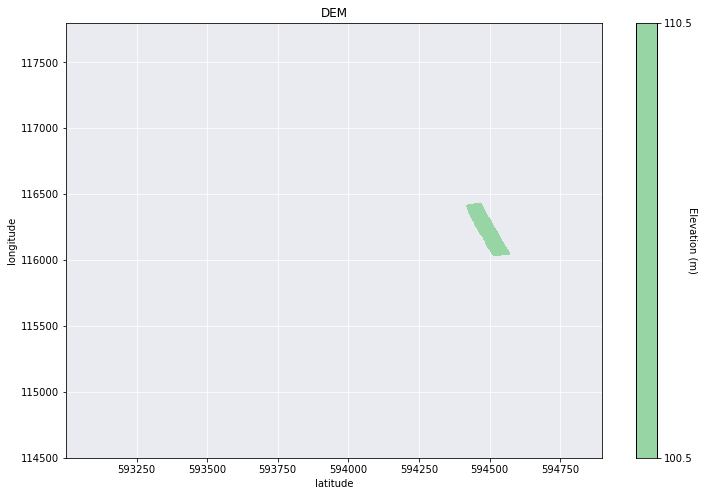

In [15]:
tin.plot.plot_dem(my_dem) # alternately, you can call `my_dem.plot_dem()`

<a id='Workflow3'></a>
#### Delineate watershed

In order to construct a dynamically refined TIN, watershed delineation is performed to capture a river feature and selectively refine the mesh around it.

This is done with the method

    my_dem.watershed_delineation(threshold:float,method:str='D8')
    
It is difficult to initially tell what the threshold value should be.

So, before performing the delineation, we can preview what feature would be generated:

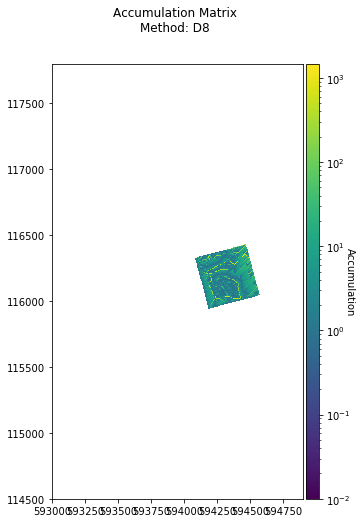

In [19]:
_ = tin.plot.preview_accumulation(my_dem)

Note that the feature appears around `1e4`. This will be our threshold value. Also, the threhold value `None` can be used *only* in `interactive` mode!

In [20]:
delineation_threshold = 1000 # set delineation threshold

my_dem.watershed_delineation(delineation_threshold,interactive=True)

# click on "Run Interact" button after running this code

interactive(children=(FloatSlider(value=1000.0, description='threshold', max=1470.0, min=-1.0, step=14.71), Dr…

<a id='Workflow4'></a>
#### Create surface mesh

Now that we are satisfied with the river feature, we can build the surface mesh.

* `DEM.build_refined_triplane(edge_min,edge_max)` - builds a surface mesh refined around a feature captured by watershed delineation, with triangle edge lengths between `min_edge` and `max_edge` size
* `DEM.build_uniform_triplane(edge_length)` - builds a surface mesh with uniform triangles, of edge length `edge_length`

Again, the threhold value `None` can be used *only* in `interactive` mode!

In [21]:
min_edge_length = 1 # set minimum edge of mesh triangle (integer only); units here are consistent with units in DEM
max_edge_length = 20 # set maximum edge of mesh triangle (integer only); units here are consistent with units in DEM

# Variably-refined mesh
my_dem.build_refined_triplane(min_edge_length, max_edge_length, interactive=True)

# Uniformly-refined mesh
#  my_dem.build_uniform_triplane(min_edge_length, max_edge_length, interactive=True)

# click on "Run Interact" button after running this code

interactive(children=(FloatRangeSlider(value=(1.0, 20.0), continuous_update=False, description='Edge Lengths:'…

#### save surface mesh

In [ ]:
outfile = '400m_domain_mesh_refined.exo'
tin.dump.to_exodus(my_dem,outfile,mesh='surface')

#### Visualize surface mesh

We can visualize the mesh with full 3D interactivity using `vtki` (press `w` to switch to wireframe mode):

In [22]:
import pyvista
pyvista.read(outfile).plot()

[17:44:09 -            to_exodus()] INFO - Wrote Exodus mesh to: "400m_domain_mesh_refined.exo"


<a id='Workflow5'></a>
#### 5. Create layered mesh

We can then create a stacked (layered) mesh.

The syntax is:

```python
DEM.build_layered_mesh(layers,matids:list=None)
```

Creating a stacked mesh requires only one argument: a list of depths to extrude. The number of layers created will be equal to the number of elements in the list.

For example, let's say that we want four layers: the first layer should be 10 meters thick, the second 20 meters, the third 30 meters, and the fourth 40 meters.

This would be represented as:

```python
depths = [10.,20.,30.,40.]
```

We can also assign material ID values to the layers, using another list of equal length.

```python
mat_ids = [1,4,2,1]
```

Note that material IDs must be integer-based.

In [159]:
depths = [1000, 1000] # set depths of layers
mat_ids = [0, 1] # set material IDs of layers

my_dem.build_layered_mesh(depths,matids=mat_ids)

[14:24:11 -        _stacked_mesh()] INFO - Stacking 2 layers
[14:24:11 -        _stacked_mesh()] INFO - Adding layer 1 with thickness 0.0
[14:24:11 -        _stacked_mesh()] INFO - Adding layer 2 with thickness 1000
[14:24:11 -        _stacked_mesh()] INFO - Adding layer 3 with thickness 1000
[14:24:12 -        _stacked_mesh()] INFO - Adding volume to layers


mo3

#### Visualize layered mesh

We can visualize the layered mesh similarly to the surface mesh:

In [160]:
import pyvista

outfile = 'stacked_mesh.exo'
tin.dump.to_exodus(my_dem,outfile,mesh='stacked')

pyvista.read(outfile).plot()

[14:24:16 -            to_exodus()] INFO - Wrote Exodus mesh to: "stacked_mesh.exo"


<a id='Workflow6'></a>
#### 6. Create facesets

TINerator has multiple methods for faceset generation, all of which are found in the `tinerator.facesets` submodule.

These are:

* `tinerator.facesets.basic`: can create top surface, bottom surface, and/or side surface facesets
* `tinerator.facesets.from_elevations`: creates top-surface facesets, discretized by elevation values
* `tinerator.facesets.sidesets`: creates side-surface facesets, discretized by clockwise [x,y] values

These faceset objects can be combined to create more complex facesets. 

#### Basic Facesets

The `basic` faceset object allows for one or more of:

* top
* sides
* bottom

Each of these sets - top, sides, bottom - will span the entire domain and will not be discretized.

##### Syntax

```python
fs_basic  = tin.facesets.basic(has_top:bool=True,has_bottom:bool=True,has_sides:bool=True)
```

#### Elevation Facesets

The `from_elevations` faceset type allows for discretization along the Z-axis for the top layer.

The discretization is controlled by the `heights` argument, which is a sequential list of elevation values.

For example, with the `heights` array

```python
heights = [50.,100.,150.,200.]
```

five facesets will be created:

* all surface elements lower than 50 meters
* all surface elements between 50 and 100 meters
* all surface elements between 100 and 150 meters
* all surface elements between 150 and 200 meters
* all surface elements greater than 200 meters

The optional argument `keep_body` allows for this discretization to be applied to the entire mesh, rather than just the surface - but this is not recommended.

##### Syntax

```python
fs_elev = tin.facesets.from_elevations(heights:list,keep_body:bool=False)
```

#### Sidesets

Sidesets are facesets that span the sides of the mesh. These may be discretized in one or both of two ways:

* Clockwise partitioning
* Layer-based partitioning

Clockwise-based partitioning allows for distinct sidesets to be created along the boundary of the DEM.

For an example, consider a square that spans 0 to 1 in both the
x and y planes. The top, right, and bottom sidesets are represented
in the drawing below:

```
    1
 _______
|       |
|       | 2
|       |
 -------
    3

```

To construct `coords` properly, the array would look like:

```
[[0.,1.], # top
 [1.,1.], # right
 [1.,0.]] # bottom
```

Layer-based partitioning is currently limited to (1) all layers, or (2) the top layer (to allow for outlet-based sidesets). This is controlled with the optional argument `top_layer`.

##### Syntax

```python
fs_ss = tin.facesets.sidesets(coords:np.ndarray,top_layer:bool=False)
```

#### Exporting Sidesets

To export a stacked mesh with defined sidesets, use the function

```python
tin.dump.to_exodus(my_dem,facesets=[list,of,facesets])
```

In [161]:
import numpy as np

# Basic facesets; Top, Bottom, and sides
# top face is labeled as "1"; bottom face is labeled as "2"; side face is labeled as "3"
fs_basic = tin.facesets.basic(has_top=True,has_bottom=True,has_sides=True)

# Top layer
fs_top  = tin.facesets.basic(has_top=True,has_bottom=False,has_sides=False)

# Discretized elevations
heights = [100, 200, 300, 400, 500, 600, 700, 800, 900]
fs_elev = tin.facesets.from_elevations(heights,keep_body=False)

# Bottom layer
fs_bottom  = tin.facesets.basic(has_top=False,has_bottom=True,has_sides=False)

# Top and bottom layers
fs_top_bottom = tin.facesets.basic(has_top=True,has_bottom=True,has_sides=False)

# Sidesets
all_sidesets = np.array([[0.,0.],[1.,1.]])
fs_ss = tin.facesets.sidesets(all_sidesets)

#### User-defined facesets

A user can define facesets along the mesh boundary.

In [ ]:
import numpy as np

# Inlet
# use ([x,y], [x, y]) coordinates to delineate (river width + padding) segment along the boundary
# [543890, 145710], [546055, 147140] # (x,y) coordinates from satellite image
inlet = np.array([[543655,145258],[547045,148348]]) # set (x,y) coordinates from viewing already made mesh in Paraview; 1620 x 1620 mesh
fs_inlet = tin.facesets.sidesets(inlet,top_layer=True)

# Outlet
# use ([x,y], [x,y]) coordinates to delineate (river width + padding) segment along the boundary
# [599020,101300], [599560, 102072] # (x,y) coordinates from satellite image
outlet = np.array([[599095,103108],[598495,101068]]) # set (x,y) coordinates of (river width + padding) along the boundary; 1620 x 1620 mesh
fs_outlet = tin.facesets.sidesets(outlet,top_layer=True)

#### Visualize facesets

We can visualize the facesets:

In [172]:
import pyvista

tin.plot.plot_facesets(my_dem,[fs_basic,fs_ss,fs_inlet,fs_outlet])

<a id='Workflow7'></a>
#### 7. Export final mesh

In [167]:
#tin.dump.to_exodus(my_dem,'final_mesh.exo',facesets=fs_basic)
#tin.dump.to_exodus(my_dem,'final_mesh.exo',facesets=fs_top)
#tin.dump.to_exodus(my_dem,'final_mesh.exo',facesets=fs_bottom)
#tin.dump.to_exodus(my_dem,'final_mesh.exo',facesets=fs_ss
tin.dump.to_exodus(my_dem,'final_mesh.exo',facesets=[fs_basic,fs_ss,fs_inlet,fs_outlet]) # 1 = side; 2 = inlet; 3 = outlet; 4 = top; 5 = bottom; 6 = side

[14:31:00 -       write_facesets()] INFO - Preparing sidesets...
[14:31:14 -       __driver_naive()] INFO - Generating top faceset
[14:31:15 -       __driver_naive()] INFO - Generating bottom faceset
[14:31:15 -       __driver_naive()] INFO - Generating sides faceset
[14:31:16 -            to_exodus()] INFO - Wrote Exodus mesh (of type: prism, with facesets: 6) to: "final_mesh.exo"


#### Visualize final mesh

We can visualize the final mesh:

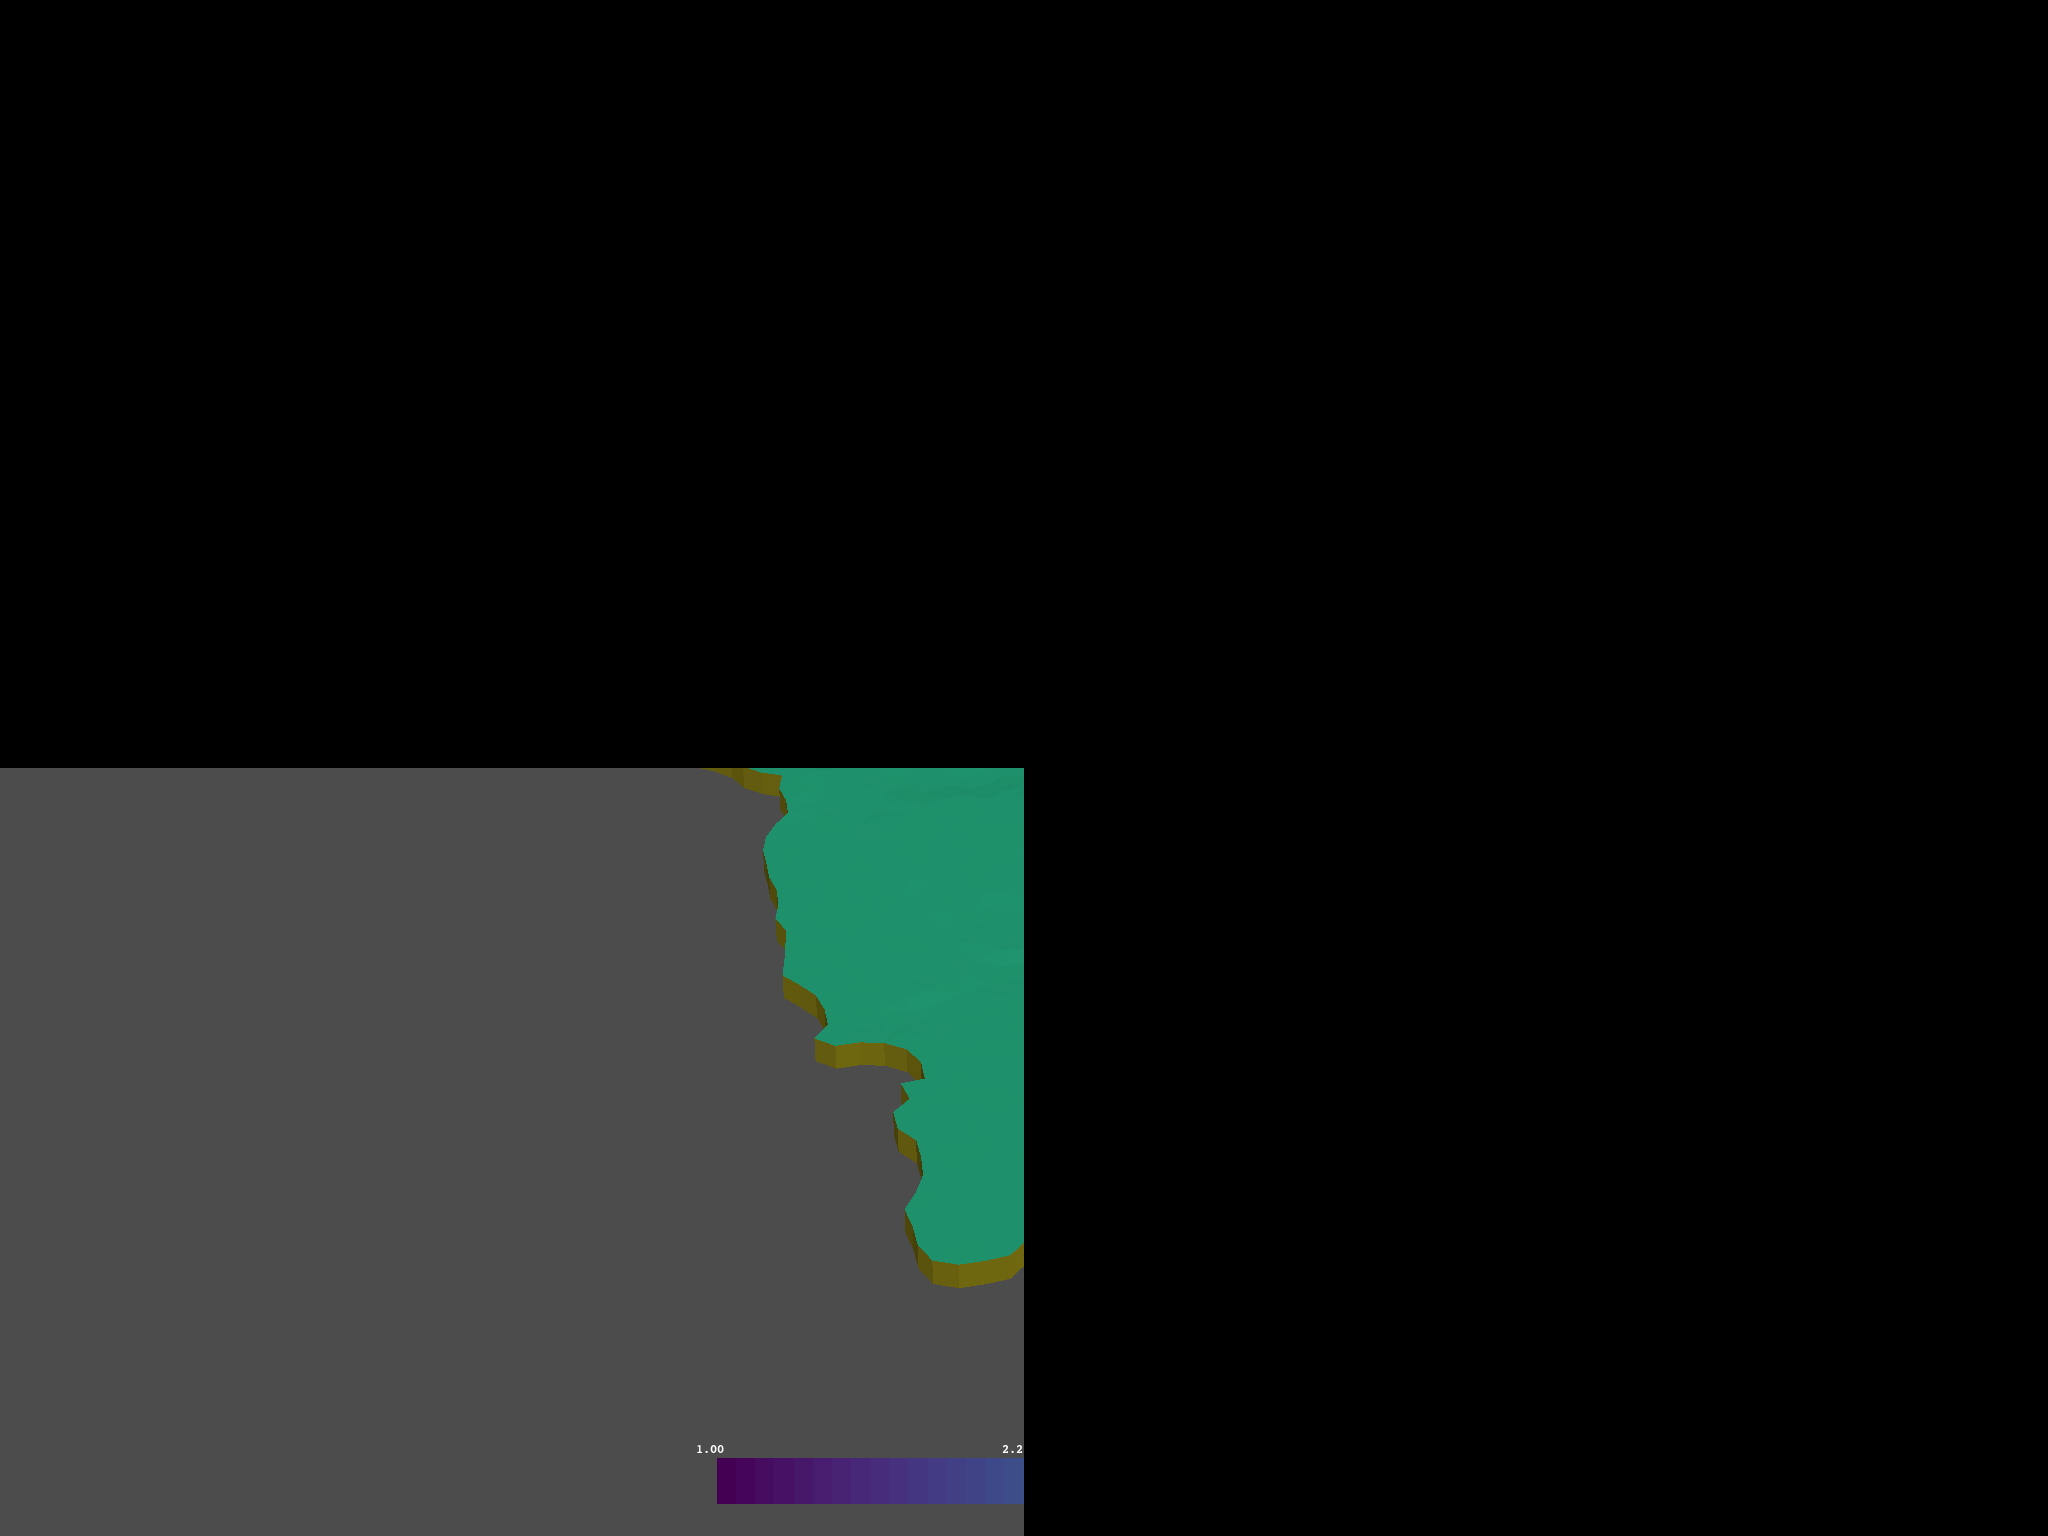

In [165]:
pyvista.read('final_mesh.exo')['Side Sets'].plot()

<a id='Conclusion'></a>
### Conclusion

This has been a basic workflow for TINerator. More advanced capabilities can be found in other Jupyter notebooks in this directory, or through the API on the [TINerator homepage](https://raw.githack.com/lanl/LaGriT/tinerator/html/index.html).

<a id='Appendix'></a>
### Appendix

Run all code at once, bypassing previous descriptions:

In [ ]:
import tinerator as tin
import os
import numpy as np
 
os.chdir('/Users/leer384/Documents/MODELING/mesh_generation/TINerator') # set working directory
dem_filename = 'data/columbia_subbasin_DEM_hanford.asc' # set filename of DEM, which is stored in "data" folder
my_dem = tin.load.from_file(dem_filename)

# Watershed river features delineation
delineation_threshold = 200000 # set delineation threshold
my_dem.watershed_delineation(delineation_threshold)

# Mesh cell edge length
edge_min = 100 # set minimum edge of mesh triangle (integer only); units here are consistent with units in DEM
edge_max = 1620  # set maximum edge of mesh triangle (integer only); units here are consistent with units in DEM
edge_length = 1620 # set uniform edge of mesh triangle (integer only); units here are consistent with units in DEM

# Mesh type
my_dem.build_refined_triplane(edge_min,edge_max) # set if variably-refined mesh (if yes, then uncomment)
#my_dem.build_uniform_triplane(edge_length) # set if uniformly-refined mesh (if yes, then uncomment)

# Mesh layers
depths = [1000, 1000] # set depths of layers
mat_ids = [0, 1] # set material IDs of layers
my_dem.build_layered_mesh(depths,matids=mat_ids)

# Mesh facesets
# Basic facesets; Top, Bottom, and sides
# top face is labeled as "1"; bottom face is labeled as "2"; side face is labeled as "3"
fs_basic = tin.facesets.basic(has_top=True,has_bottom=True,has_sides=True)
 
# Top layer
fs_top  = tin.facesets.basic(has_top=True,has_bottom=False,has_sides=False)
 
# Discretized elevations
heights = [100, 200, 300, 400, 500, 600, 700, 800, 900]
fs_elev = tin.facesets.from_elevations(heights,keep_body=False)
 
# Bottom layer
fs_bottom  = tin.facesets.basic(has_top=False,has_bottom=True,has_sides=False)

# Top and bottom layers
fs_top_bottom = tin.facesets.basic(has_top=True,has_bottom=True,has_sides=False)

# Sidesets
all_sidesets = np.array([[0.,0.],[1.,1.]])
fs_ss = tin.facesets.sidesets(all_sidesets)

# Inlet
# use ([x,y], [x, y]) coordinates to delineate (river width + padding) segment along the boundary
# [543890, 145710], [546055, 147140] # (x,y) coordinates from satellite image
inlet = np.array([[543655,145258],[547045,148348]]) # set (x,y) coordinates from viewing already made mesh in Paraview; 1620 x 1620 mesh
fs_inlet = tin.facesets.sidesets(inlet,top_layer=True)

# Outlet
# use ([x,y], [x,y]) coordinates to delineate (river width + padding) segment along the boundary
# [599020,101300], [599560, 102072] # (x,y) coordinates from satellite image
outlet = np.array([[599095,103108],[598495,101068]]) # set (x,y) coordinates of (river width + padding) along the boundary; 1620 x 1620 mesh
fs_outlet = tin.facesets.sidesets(outlet,top_layer=True)



# Export mesh
tin.dump.to_exodus(my_dem,'final_mesh.exo',facesets=[fs_basic,fs_ss,fs_inlet,fs_outlet]) # 1 = side sans outlet; 2 = inlet; 3 = outlet; 4 = top; 5 = bottom; 6 = full side

# Visualize DEM
print('DEM:')
tin.plot.plot_dem(my_dem)

# Visualize facesets
print('Facesets:')
tin.plot.plot_facesets(my_dem,[fs_basic,fs_ss,fs_inlet,fs_outlet])

# Print TINerator version
print('TINerator version ' + tin.VERSION)